In [1]:
from train_test_fns import *
from sklearn.linear_model import ElasticNetCV
from sklearn.linear_model import ElasticNet

%config InlineBackend.figure_format = 'png'
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 300


In [2]:
def train_EN_model(train_x, train_y, predict_x):
    #print_title("ElasticNet")
    #train_x, predict_x = standarize_feature(_train_x, _predict_x)

    #l1_ratios = [1e-4, 1e-3, 1e-2, 1e-1]
    #l1_ratios = [1e-5, 1e-4, 1e-3]
    l1_ratios = [.001,.01,.1,.2,.5, 0.99,1]
    #l1_ratios = [.5]
    min_mse = 1
    for r in l1_ratios:
        #t1 = time.time()
        reg_en = ElasticNetCV(
            l1_ratio=r, cv=10, n_jobs=-1, verbose=0, precompute=True)
        reg_en.fit(train_x, train_y)
        n_nonzeros = (reg_en.coef_ != 0).sum()
        _mse = np.mean(reg_en.mse_path_, axis=1)[
            np.where(reg_en.alphas_ == reg_en.alpha_)[0][0]]
        if _mse < min_mse:
            min_mse = _mse
            best_l1_ratio = r
            best_alpha = reg_en.alpha_
        #t2 = time.time()
        print("ratio(%e) -- n: %d -- alpha: %f -- mse: %f -- " %
              (r, n_nonzeros, reg_en.alpha_, _mse))

    print("Best l1_ratio and alpha: %f, %f" % (best_l1_ratio, best_alpha))
    # predict_model
    reg = ElasticNet(l1_ratio=best_l1_ratio, alpha=best_alpha)
    reg.fit(train_x, train_y)
    n_nonzeros = (reg.coef_ != 0).sum()

    predict_y = reg.predict(predict_x)
    train_y_pred = reg.predict(train_x)
    return {"y": predict_y, "train_y": train_y_pred, "coef": reg.coef_, 'n_cols':n_nonzeros,'l1':best_l1_ratio}

In [3]:
def elastic_net_cv_with_cutoffs():
    cutoffs = [(i+1)*100000 for i in range(20)]
    errors = []
    val_list = []
    for i in cutoffs:
        train_X, train_y, test_X,test_y = load_and_split_data(i)
        vals = train_EN_model(train_X,train_y,test_X)
        preds = vals['y']
        error = 10**(MSE(preds,test_y)**.5)
        errors.append(error)
        val_list.append(vals)
    return cutoffs, errors, val_list

In [4]:
cut,err,val_list = elastic_net_cv_with_cutoffs()

ratio(1.000000e-03) -- n: 73 -- alpha: 0.058260 -- mse: 0.157087 -- 
ratio(1.000000e-02) -- n: 72 -- alpha: 0.005826 -- mse: 0.125292 -- 
ratio(1.000000e-01) -- n: 65 -- alpha: 0.001171 -- mse: 0.123255 -- 
ratio(2.000000e-01) -- n: 56 -- alpha: 0.001176 -- mse: 0.123084 -- 
ratio(5.000000e-01) -- n: 47 -- alpha: 0.000822 -- mse: 0.122960 -- 
ratio(9.900000e-01) -- n: 40 -- alpha: 0.000677 -- mse: 0.123052 -- 
ratio(1.000000e+00) -- n: 40 -- alpha: 0.000670 -- mse: 0.123053 -- 
Best l1_ratio and alpha: 0.500000, 0.000822
ratio(1.000000e-03) -- n: 73 -- alpha: 0.058260 -- mse: 0.157087 -- 
ratio(1.000000e-02) -- n: 72 -- alpha: 0.005826 -- mse: 0.125292 -- 
ratio(1.000000e-01) -- n: 65 -- alpha: 0.001171 -- mse: 0.123255 -- 
ratio(2.000000e-01) -- n: 56 -- alpha: 0.001176 -- mse: 0.123084 -- 
ratio(5.000000e-01) -- n: 47 -- alpha: 0.000822 -- mse: 0.122960 -- 
ratio(9.900000e-01) -- n: 40 -- alpha: 0.000677 -- mse: 0.123052 -- 
ratio(1.000000e+00) -- n: 40 -- alpha: 0.000670 -- mse: 0.1

/usr/local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


ratio(9.900000e-01) -- n: 47 -- alpha: 0.000460 -- mse: 0.110683 -- 


/usr/local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


ratio(1.000000e+00) -- n: 47 -- alpha: 0.000456 -- mse: 0.110685 -- 
Best l1_ratio and alpha: 0.500000, 0.000850
ratio(1.000000e-03) -- n: 72 -- alpha: 0.049026 -- mse: 0.095962 -- 
ratio(1.000000e-02) -- n: 72 -- alpha: 0.004903 -- mse: 0.081009 -- 
ratio(1.000000e-01) -- n: 66 -- alpha: 0.000490 -- mse: 0.079471 -- 
ratio(2.000000e-01) -- n: 67 -- alpha: 0.000245 -- mse: 0.079335 -- 
ratio(5.000000e-01) -- n: 61 -- alpha: 0.000098 -- mse: 0.079185 -- 


/usr/local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


ratio(9.900000e-01) -- n: 59 -- alpha: 0.000061 -- mse: 0.079133 -- 


/usr/local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


ratio(1.000000e+00) -- n: 59 -- alpha: 0.000060 -- mse: 0.079133 -- 
Best l1_ratio and alpha: 1.000000, 0.000060
ratio(1.000000e-03) -- n: 72 -- alpha: 0.047958 -- mse: 0.089283 -- 
ratio(1.000000e-02) -- n: 69 -- alpha: 0.004796 -- mse: 0.075321 -- 
ratio(1.000000e-01) -- n: 68 -- alpha: 0.000480 -- mse: 0.073937 -- 
ratio(2.000000e-01) -- n: 67 -- alpha: 0.000240 -- mse: 0.073788 -- 
ratio(5.000000e-01) -- n: 62 -- alpha: 0.000096 -- mse: 0.073628 -- 


/usr/local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/usr/local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/usr/local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


ratio(9.900000e-01) -- n: 57 -- alpha: 0.000060 -- mse: 0.073562 -- 


/usr/local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


ratio(1.000000e+00) -- n: 57 -- alpha: 0.000059 -- mse: 0.073561 -- 
Best l1_ratio and alpha: 1.000000, 0.000059
ratio(1.000000e-03) -- n: 73 -- alpha: 0.046027 -- mse: 0.084873 -- 
ratio(1.000000e-02) -- n: 71 -- alpha: 0.004603 -- mse: 0.071426 -- 
ratio(1.000000e-01) -- n: 70 -- alpha: 0.000460 -- mse: 0.070145 -- 
ratio(2.000000e-01) -- n: 68 -- alpha: 0.000230 -- mse: 0.070019 -- 


/usr/local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/usr/local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


ratio(5.000000e-01) -- n: 62 -- alpha: 0.000092 -- mse: 0.069858 -- 


/usr/local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/usr/local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


ratio(9.900000e-01) -- n: 60 -- alpha: 0.000053 -- mse: 0.069804 -- 


/usr/local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


ratio(1.000000e+00) -- n: 60 -- alpha: 0.000053 -- mse: 0.069804 -- 
Best l1_ratio and alpha: 1.000000, 0.000053
ratio(1.000000e-03) -- n: 72 -- alpha: 0.043712 -- mse: 0.081193 -- 
ratio(1.000000e-02) -- n: 71 -- alpha: 0.004371 -- mse: 0.068367 -- 
ratio(1.000000e-01) -- n: 69 -- alpha: 0.000437 -- mse: 0.067137 -- 
ratio(2.000000e-01) -- n: 66 -- alpha: 0.000219 -- mse: 0.067031 -- 


/usr/local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/usr/local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


ratio(5.000000e-01) -- n: 64 -- alpha: 0.000087 -- mse: 0.066912 -- 


/usr/local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/usr/local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


ratio(9.900000e-01) -- n: 61 -- alpha: 0.000058 -- mse: 0.066888 -- 


/usr/local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


ratio(1.000000e+00) -- n: 61 -- alpha: 0.000058 -- mse: 0.066887 -- 
Best l1_ratio and alpha: 1.000000, 0.000058
ratio(1.000000e-03) -- n: 72 -- alpha: 0.039129 -- mse: 0.077357 -- 
ratio(1.000000e-02) -- n: 70 -- alpha: 0.003913 -- mse: 0.065657 -- 
ratio(1.000000e-01) -- n: 67 -- alpha: 0.000555 -- mse: 0.064687 -- 
ratio(2.000000e-01) -- n: 67 -- alpha: 0.000196 -- mse: 0.064604 -- 


/usr/local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/usr/local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


ratio(5.000000e-01) -- n: 63 -- alpha: 0.000084 -- mse: 0.064527 -- 


/usr/local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/usr/local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


ratio(9.900000e-01) -- n: 61 -- alpha: 0.000056 -- mse: 0.064524 -- 


/usr/local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


ratio(1.000000e+00) -- n: 61 -- alpha: 0.000055 -- mse: 0.064524 -- 
Best l1_ratio and alpha: 0.990000, 0.000056
ratio(1.000000e-03) -- n: 73 -- alpha: 0.035135 -- mse: 0.071436 -- 
ratio(1.000000e-02) -- n: 72 -- alpha: 0.003514 -- mse: 0.061315 -- 
ratio(1.000000e-01) -- n: 68 -- alpha: 0.000351 -- mse: 0.060628 -- 
ratio(2.000000e-01) -- n: 52 -- alpha: 0.001005 -- mse: 0.060568 -- 
ratio(5.000000e-01) -- n: 46 -- alpha: 0.000655 -- mse: 0.060531 -- 


/usr/local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


ratio(9.900000e-01) -- n: 43 -- alpha: 0.000381 -- mse: 0.060554 -- 


/usr/local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


ratio(1.000000e+00) -- n: 43 -- alpha: 0.000377 -- mse: 0.060555 -- 
Best l1_ratio and alpha: 0.500000, 0.000655
ratio(1.000000e-03) -- n: 73 -- alpha: 0.032180 -- mse: 0.067163 -- 
ratio(1.000000e-02) -- n: 72 -- alpha: 0.003218 -- mse: 0.058114 -- 
ratio(1.000000e-01) -- n: 63 -- alpha: 0.000647 -- mse: 0.057536 -- 
ratio(2.000000e-01) -- n: 51 -- alpha: 0.001135 -- mse: 0.057509 -- 
ratio(5.000000e-01) -- n: 42 -- alpha: 0.000740 -- mse: 0.057385 -- 


/usr/local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


ratio(9.900000e-01) -- n: 41 -- alpha: 0.000374 -- mse: 0.057381 -- 


/usr/local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


ratio(1.000000e+00) -- n: 41 -- alpha: 0.000370 -- mse: 0.057380 -- 
Best l1_ratio and alpha: 1.000000, 0.000370
ratio(1.000000e-03) -- n: 71 -- alpha: 0.029194 -- mse: 0.063423 -- 
ratio(1.000000e-02) -- n: 70 -- alpha: 0.002919 -- mse: 0.055358 -- 
ratio(1.000000e-01) -- n: 65 -- alpha: 0.000674 -- mse: 0.054869 -- 
ratio(2.000000e-01) -- n: 52 -- alpha: 0.001104 -- mse: 0.054844 -- 
ratio(5.000000e-01) -- n: 42 -- alpha: 0.000720 -- mse: 0.054730 -- 


/usr/local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


ratio(9.900000e-01) -- n: 39 -- alpha: 0.000448 -- mse: 0.054771 -- 


/usr/local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


ratio(1.000000e+00) -- n: 39 -- alpha: 0.000444 -- mse: 0.054773 -- 
Best l1_ratio and alpha: 0.500000, 0.000720
ratio(1.000000e-03) -- n: 71 -- alpha: 0.028262 -- mse: 0.060890 -- 
ratio(1.000000e-02) -- n: 73 -- alpha: 0.002826 -- mse: 0.053265 -- 
ratio(1.000000e-01) -- n: 64 -- alpha: 0.000700 -- mse: 0.052793 -- 
ratio(2.000000e-01) -- n: 54 -- alpha: 0.000997 -- mse: 0.052749 -- 


/usr/local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/usr/local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


ratio(5.000000e-01) -- n: 43 -- alpha: 0.000697 -- mse: 0.052672 -- 
ratio(9.900000e-01) -- n: 43 -- alpha: 0.000405 -- mse: 0.052722 -- 


/usr/local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


ratio(1.000000e+00) -- n: 45 -- alpha: 0.000303 -- mse: 0.052722 -- 
Best l1_ratio and alpha: 0.500000, 0.000697
ratio(1.000000e-03) -- n: 73 -- alpha: 0.026298 -- mse: 0.059205 -- 
ratio(1.000000e-02) -- n: 71 -- alpha: 0.002630 -- mse: 0.052407 -- 
ratio(1.000000e-01) -- n: 67 -- alpha: 0.000651 -- mse: 0.052029 -- 
ratio(2.000000e-01) -- n: 51 -- alpha: 0.001226 -- mse: 0.051968 -- 
ratio(5.000000e-01) -- n: 43 -- alpha: 0.000695 -- mse: 0.051869 -- 


/usr/local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


ratio(9.900000e-01) -- n: 42 -- alpha: 0.000433 -- mse: 0.051927 -- 


/usr/local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


ratio(1.000000e+00) -- n: 42 -- alpha: 0.000429 -- mse: 0.051929 -- 
Best l1_ratio and alpha: 0.500000, 0.000695
ratio(1.000000e-03) -- n: 71 -- alpha: 0.024374 -- mse: 0.056697 -- 
ratio(1.000000e-02) -- n: 72 -- alpha: 0.002437 -- mse: 0.050588 -- 
ratio(1.000000e-01) -- n: 65 -- alpha: 0.000647 -- mse: 0.050286 -- 
ratio(2.000000e-01) -- n: 54 -- alpha: 0.001060 -- mse: 0.050269 -- 
ratio(5.000000e-01) -- n: 45 -- alpha: 0.000741 -- mse: 0.050191 -- 


/usr/local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


ratio(9.900000e-01) -- n: 41 -- alpha: 0.000430 -- mse: 0.050241 -- 


/usr/local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


ratio(1.000000e+00) -- n: 41 -- alpha: 0.000426 -- mse: 0.050243 -- 
Best l1_ratio and alpha: 0.500000, 0.000741
ratio(1.000000e-03) -- n: 71 -- alpha: 0.023555 -- mse: 0.054410 -- 
ratio(1.000000e-02) -- n: 73 -- alpha: 0.002355 -- mse: 0.048646 -- 
ratio(1.000000e-01) -- n: 65 -- alpha: 0.000671 -- mse: 0.048370 -- 
ratio(2.000000e-01) -- n: 57 -- alpha: 0.000831 -- mse: 0.048328 -- 
ratio(5.000000e-01) -- n: 43 -- alpha: 0.000668 -- mse: 0.048251 -- 


/usr/local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


ratio(9.900000e-01) -- n: 43 -- alpha: 0.000388 -- mse: 0.048308 -- 


/usr/local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


ratio(1.000000e+00) -- n: 43 -- alpha: 0.000384 -- mse: 0.048310 -- 
Best l1_ratio and alpha: 0.500000, 0.000668
ratio(1.000000e-03) -- n: 73 -- alpha: 0.022609 -- mse: 0.053109 -- 
ratio(1.000000e-02) -- n: 73 -- alpha: 0.002261 -- mse: 0.047777 -- 
ratio(1.000000e-01) -- n: 65 -- alpha: 0.000740 -- mse: 0.047532 -- 
ratio(2.000000e-01) -- n: 46 -- alpha: 0.001130 -- mse: 0.047454 -- 
ratio(5.000000e-01) -- n: 42 -- alpha: 0.000687 -- mse: 0.047383 -- 


/usr/local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


ratio(9.900000e-01) -- n: 43 -- alpha: 0.000372 -- mse: 0.047452 -- 


/usr/local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


ratio(1.000000e+00) -- n: 43 -- alpha: 0.000368 -- mse: 0.047453 -- 
Best l1_ratio and alpha: 0.500000, 0.000687
ratio(1.000000e-03) -- n: 73 -- alpha: 0.021686 -- mse: 0.051871 -- 
ratio(1.000000e-02) -- n: 71 -- alpha: 0.002169 -- mse: 0.046819 -- 
ratio(1.000000e-01) -- n: 65 -- alpha: 0.000217 -- mse: 0.046488 -- 
ratio(2.000000e-01) -- n: 55 -- alpha: 0.000665 -- mse: 0.046458 -- 
ratio(5.000000e-01) -- n: 42 -- alpha: 0.000615 -- mse: 0.046355 -- 


/usr/local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


ratio(9.900000e-01) -- n: 42 -- alpha: 0.000333 -- mse: 0.046364 -- 


/usr/local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


ratio(1.000000e+00) -- n: 42 -- alpha: 0.000330 -- mse: 0.046365 -- 
Best l1_ratio and alpha: 0.500000, 0.000615
ratio(1.000000e-03) -- n: 72 -- alpha: 0.021374 -- mse: 0.050577 -- 
ratio(1.000000e-02) -- n: 70 -- alpha: 0.002137 -- mse: 0.045629 -- 
ratio(1.000000e-01) -- n: 65 -- alpha: 0.000214 -- mse: 0.045314 -- 
ratio(2.000000e-01) -- n: 57 -- alpha: 0.000463 -- mse: 0.045295 -- 
ratio(5.000000e-01) -- n: 44 -- alpha: 0.000606 -- mse: 0.045228 -- 


/usr/local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


ratio(9.900000e-01) -- n: 44 -- alpha: 0.000306 -- mse: 0.045231 -- 


/usr/local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


ratio(1.000000e+00) -- n: 44 -- alpha: 0.000303 -- mse: 0.045231 -- 
Best l1_ratio and alpha: 0.500000, 0.000606


In [5]:
def plot_with_cutoff_and_cols(cut,err):
    fig,ax = plt.subplots(figsize=(8,4))

    ax.scatter([i/1000 for i in cut],err)
    #ax2.scatter([i/1000 for i in cut],[i/10 for i in cols])
    ax.set_title("Error Factor vs Cutoff Salary")
    ax.set_ylabel("Error Factor")
    ax.set_xlabel("Minimum Salary (Thousands)")
    ax.set_yticks([i/2+1 for i in range(5)]);
    ax.set_xticks([0,500,1000,1500,2000]);
    plt.tight_layout()
    plt.savefig('error_by_cutoff.png')

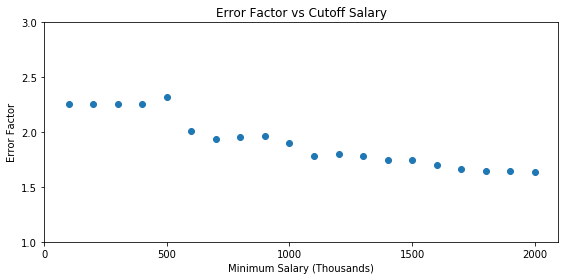

In [6]:
plot_with_cutoff_and_cols(cut,err)

In [7]:
def get_best_worst_params(cutoff):
    train_X, train_y, test_X,test_y = load_and_split_data(cutoff)
    vals = train_EN_model(train_X,train_y,test_X)
    params = pd.DataFrame(train_X.columns,vals['coef']).reset_index()
    params.columns = ['value','column']
    top_params = params.iloc[params['value'].nlargest(20).index]
    bottom_params = params.iloc[params['value'].nsmallest(10).index]
    top_teams = top_params[top_params.column.str.contains('tm_')].reset_index().drop('index',axis=1)
    top_numeric = top_params[~top_params.column.str.contains('tm_')].reset_index().drop('index',axis=1)
    bottom_teams = bottom_params[bottom_params.column.str.contains('tm_')].reset_index().drop('index',axis=1)
    bottom_numeric = bottom_params[~bottom_params.column.str.contains('tm_')].reset_index().drop('index',axis=1)
    
    return top_teams,bottom_teams,top_numeric,bottom_numeric

In [11]:
a,b,c,d = get_best_worst_params(1000000)

ratio(1.000000e-03) -- n: 72 -- alpha: 0.039129 -- mse: 0.077357 -- 
ratio(1.000000e-02) -- n: 70 -- alpha: 0.003913 -- mse: 0.065657 -- 
ratio(1.000000e-01) -- n: 67 -- alpha: 0.000555 -- mse: 0.064687 -- 
ratio(2.000000e-01) -- n: 67 -- alpha: 0.000196 -- mse: 0.064604 -- 


/usr/local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/usr/local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


ratio(5.000000e-01) -- n: 63 -- alpha: 0.000084 -- mse: 0.064527 -- 


/usr/local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/usr/local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


ratio(9.900000e-01) -- n: 61 -- alpha: 0.000056 -- mse: 0.064524 -- 
ratio(1.000000e+00) -- n: 61 -- alpha: 0.000055 -- mse: 0.064524 -- 
Best l1_ratio and alpha: 0.990000, 0.000056


/usr/local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [12]:
c

,value,column
0,1.390876,pa/g
1,0.712732,rar
2,0.674476,years_in_mlb
3,0.594101,ibb
4,0.498746,g
5,0.393068,slg
6,0.307903,gidp
7,0.264596,rdp
8,0.185706,year
9,0.143247,sb


In [10]:
d

,value,column
0,-0.252245,sh
1,-0.091790,3b
2,-0.047819,acquired_fa
3,-0.040195,acquired_dr


In [ ]:
sal_df = pd.read_pickle('salary_17.pkl')

In [ ]:
sal_df['salary'] = sal_df['Salary'].apply(lambda x: x.replace('$','').replace(',',''))

In [ ]:
sal_df = sal_df.apply(pd.to_numeric, errors='ignore').drop('Salary',axis=1).drop(30,axis=0)

In [ ]:
sal_df.info()

In [ ]:
sorted_salaries = sal_df.sort_values(['salary'],ascending=False).reset_index().drop('index',axis=1)

In [ ]:
sorted_salaries

In [ ]:
def make_residual_plot(cutoff,val_list):
    import matplotlib as mpl
    mpl.rcParams['figure.dpi']= 300
    train_X, train_y, test_X, test_y = load_and_split_data(cutoff)
    predictions = pd.DataFrame(val_list[int(cutoff/1e5)-1]['y'])
    test_actual = pd.DataFrame(test_y)
    test_actual = test_actual.reset_index().drop(['index'],axis=1)
    test_actual['calculated'] = predictions[0]
    test_actual['residual'] = test_actual['log10_adj'] - test_actual['calculated']
    #return test_actual
    fig,ax = plt.subplots(figsize=(8,4))
    
    ax.scatter(10**test_actual['log10_adj']/1e6,test_actual['residual'],alpha=.4)
    ax.plot([i for i in range(30)],[0 for i in range(30)],c='r',alpha=.5)
    ax.set_yticks([i/4 -1 for i in range(-1,10)])
    ax.set_xticks([0,5,10,15,20,25,30])
    ax.set_title("Plot of Residuals vs log(salary) for minimum salary of ${:,}".format(cutoff))
    ax.set_ylabel("Residual (log-10)")
    ax.set_xlabel("Salary (Millions)")
    plt.tight_layout()
    plt.savefig('residual_plot_{0}.png'.format(cutoff))
    

In [ ]:
make_residual_plot(500000,val_list)

In [ ]:
make_residual_plot(1000000,val_list)

In [ ]:
make_residual_plot(1500000,val_list)